Eng yaxshi parametrlar: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Eng yaxshi CV aniqligi: 0.9583333333333334

Test to'plami aniqligi: 100.00%

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



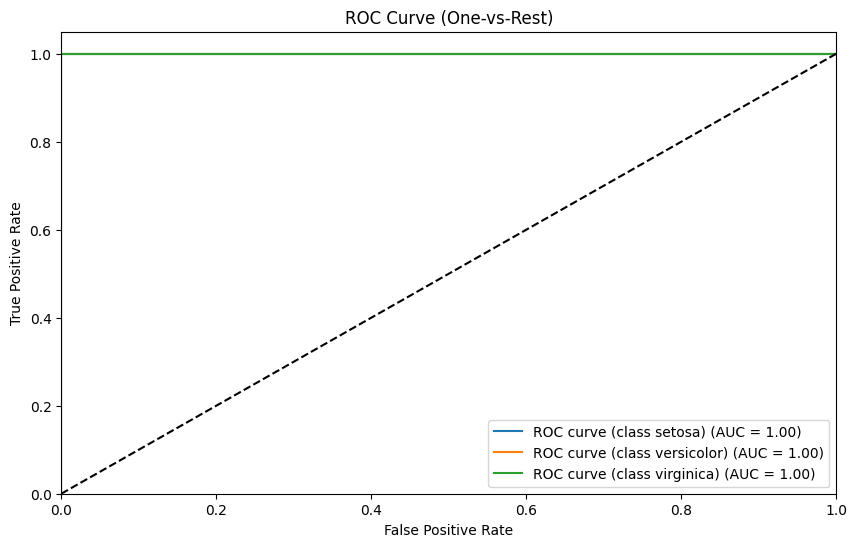

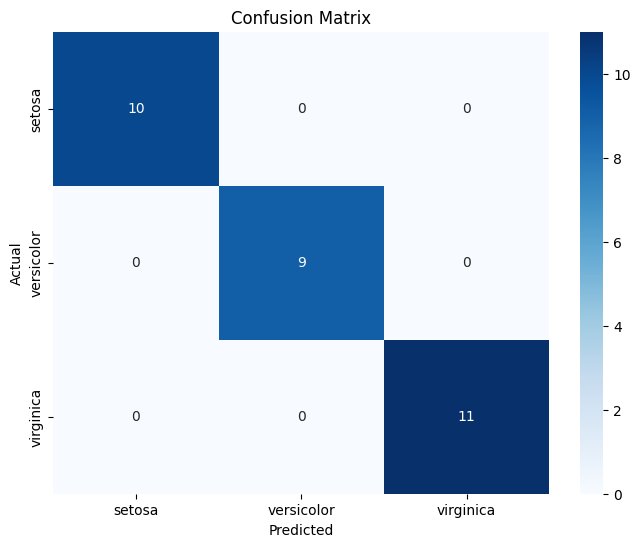

In [1]:
# Kerakli kutubxonalarni import qilish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Iris datasetini yuklash
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Ma'lumotlarni DataFrame ga aylantirish (vizualizatsiya uchun qulay)
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# 1. Ma'lumotlarni oldindan ishlov berish
# Xususiyatlarni standartlashtirish (KNN masofa asosidagi algoritm bo'lgani uchun muhim)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ma'lumotlarni o'quv va test to'plamlariga bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. KNN modelini sozlash va GridSearchCV bilan optimallashtirish
base_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # k qo'shnilar soni
    'weights': ['uniform', 'distance'],    # Qadoqlash usullari
    'metric': ['euclidean', 'manhattan']   # Masofa o'lchovlari
}
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Eng yaxshi modelni olish
best_model = grid_search.best_estimator_
print("Eng yaxshi parametrlar:", grid_search.best_params_)
print("Eng yaxshi CV aniqligi:", grid_search.best_score_)

# 3. Test to'plamida bashorat qilish
y_pred = best_model.predict(X_test)

# 4. Modelni baholash
# Aniqlik (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest to'plami aniqligi: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# 5. ROC Curve (One-vs-Rest uchun)
plt.figure(figsize=(10, 6))
for i in range(len(class_names)):
    # One-vs-Rest ROC curve
    y_test_bin = (y_test == i).astype(int)
    y_score = best_model.predict_proba(X_test)[:, i]
    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {class_names[i]}) (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

# 6. Confusion Matrix vizualizatsiyasi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()